<a href="https://colab.research.google.com/github/meghnaparsan/K-Means-Clutering/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import Sequential
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add (ResNet50 (include_top = False, pooling = 'avg'))













94773248/94765736 [==============================] - 2s 0us/step


In [0]:
model.layers[0].trainable = False

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
folderPath = "/content/drive/My Drive/Datasets/image"
categories = ["fabric", "foliage", "glass", "leather", "metal", "paper", "plastic", "stone", "water", "wood"]

In [0]:
import os
import cv2
import numpy as np

features = []
for category in categories:
  path = os.path.join (folderPath, category)
  for image in os.listdir (path):
    try:
      imageRead = cv2.imread (os.path.join (path, image))
      imageRead = cv2.resize (imageRead, (500, 500))
      preprocessed_image = preprocess_input (np.expand_dims (imageRead.copy(), axis = 0))
      image_feature = model.predict (preprocessed_image)
      image_array = np.array (image_feature)
      features.append (image_array.flatten())
    except Exception as e:
      pass


In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans (n_clusters = 10, random_state = 0).fit (features)


In [0]:
kmeans.cluster_centers_

array([[0.24226659, 0.69473383, 0.12265402, ..., 0.30971634, 0.8147618 ,
        0.51049544],
       [0.24948345, 0.65276749, 0.22684787, ..., 0.51407451, 1.01768635,
        0.26430111],
       [0.45315431, 0.96974329, 0.11974668, ..., 0.5414912 , 0.31383272,
        0.67862616],
       [0.21170023, 0.41929212, 0.34103667, ..., 0.39565584, 1.20271605,
        0.18948531],
       [0.31311308, 1.13300321, 0.37439774, ..., 0.95343396, 0.3968811 ,
        0.3262867 ],
       [0.1797699 , 0.7104115 , 0.07023203, ..., 0.4187929 , 1.26735054,
        0.20201165]])

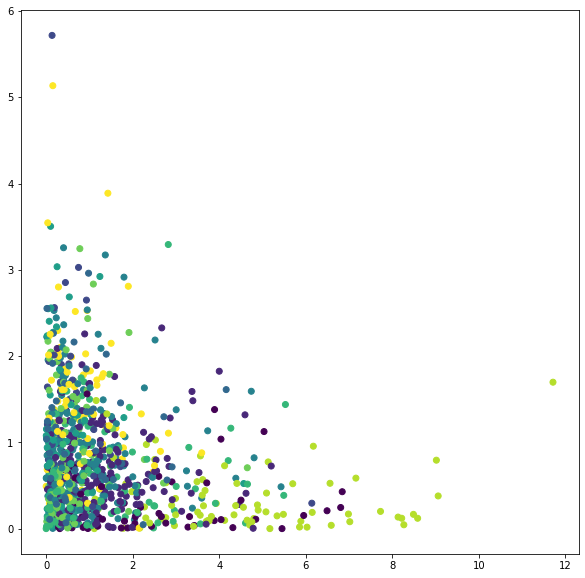

In [0]:
from matplotlib import pyplot as plt

plt.figure (figsize = (10, 10))
colors = ["red", "blue", "orange", "black", "green", "purple"]

features_array = np.array (features)

plt.scatter (features_array[:,0], features_array[:,1], c = kmeans.labels_.astype (float))

# plt.scatter (features_array[:,0], features_array[:, 1])

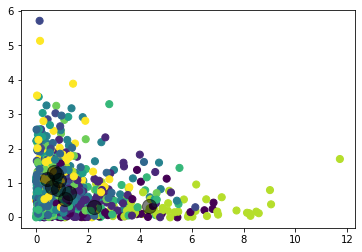

In [0]:
y_kmeans = kmeans.predict (features)
plt.scatter (features_array[:, 0], features_array [:, 1], c = y_kmeans, s = 50, cmap = "viridis")
centers = kmeans.cluster_centers_
plt.scatter (centers[:, 0], centers[:, 1], c = "black", s = 200, alpha = 0.5)